In [8]:
from xgcm import Grid

import numpy as np  # numerical library
import xarray as xr  # netCDF library
import pandas as pd

import matplotlib.pyplot as plt  # plotting library
import cartopy  # Map projections libary
import cartopy.crs as ccrs  # Projections list
import cftime

import seawater as sw

# Settings

In [9]:
plt.rcParams['figure.figsize'] = (12, 5)  # Default plot size

In [10]:
loni=360-70
lonf=360-23

## Extract data

In [22]:
RG = xr.open_dataset('./Data/RG_interp_24N.nc')
RG_2000 = RG.interp(pre = np.arange(10,1900,10), method="linear")

In [23]:
ISAS = xr.open_dataset('./Data/ISAS20_interp_24N.nc')
ISAS = ISAS.assign_coords(pre=sw.pres(ISAS.depth,24.5))

In [26]:
ISAS_2000 = ISAS.interp(depth = np.arange(10,1900,10), method="linear")

In [29]:
EN422l09 = xr.open_dataset('./Data/EN422l09_interp_24N.nc')
EN422l09_2000 = EN422l09.interp(depth = np.arange(10,1900,10), method="linear")

In [ ]:
EN422g10 = xr.open_dataset('./Data/EN422g10_interp_24N.nc')
EN422g10_2000 = EN422l09.interp(depth = np.arange(10,1900,10), method="linear")

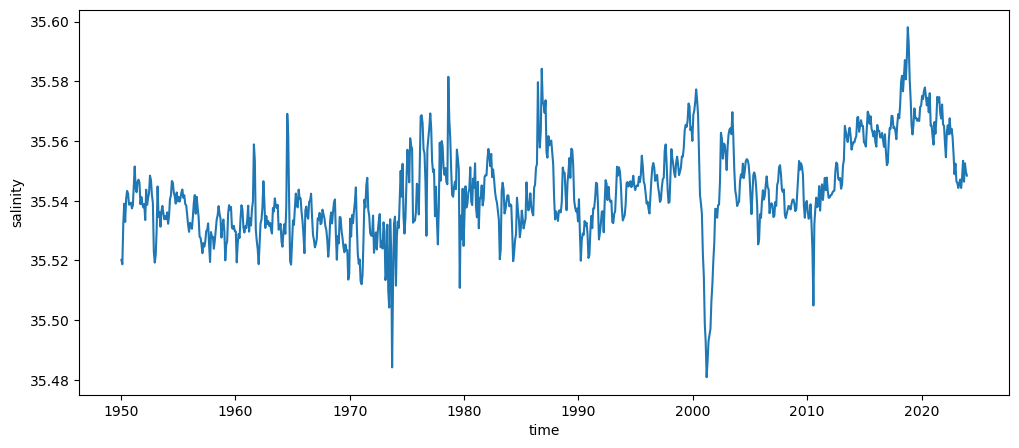

In [33]:
EN422g10_2000.salinity.mean('depth').mean('lon').plot()

## Plots

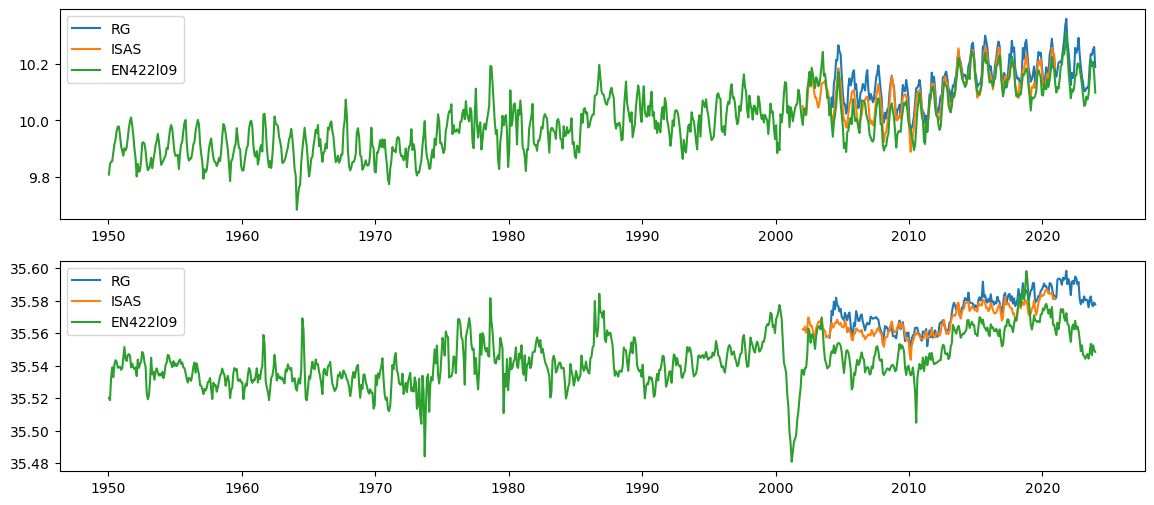

In [35]:
ig, ax = plt.subplots(2,1,figsize = (14,8))

ax[0].plot(RG_2000.time,RG_2000.temperature.mean('pre').mean('lon'), label='RG')
ax[0].plot(ISAS_2000.time,ISAS_2000.temperature.mean('depth').mean('lon'), label='ISAS')
ax[0].plot(EN422l09_2000.time,-273+EN422l09_2000.temperature.mean('depth').mean('lon'), label='EN422l09')
ax[0].plot(EN422g10_2000.time,-273+EN422g10_2000.temperature.mean('depth').mean('lon'), label='EN422g10')
ax[0].legend()

ax[1].plot(RG_2000.time,RG_2000.salinity.mean('pre').mean('lon'), label='RG')
ax[1].plot(ISAS_2000.time,ISAS_2000.salinity.mean('depth').mean('lon'), label='ISAS')
ax[1].plot(EN422l09_2000.time,EN422l09_2000.salinity.mean('depth').mean('lon'), label='EN422l09')
ax[1].plot(EN422g10_2000.time,EN422g10_2000.salinity.mean('depth').mean('lon'), label='EN422g10')

ax[1].legend()
